<a href="https://colab.research.google.com/github/Syeddaniel711/Portfolio-DataScientist/blob/main/International%20GHG%20Emission%20and%20Global%20Warming%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **International GHG Emission and Global Warming Analysis**

In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from matplotlib.colors import ListedColormap

from datetime import datetime
from datetime import timedelta

**Introduction**

Greenhouse gases play an important role in determining Earth's climate, ensuring a delicate balance that permits life to flourish. However, human activities have drastically disrupted this ecosystem, resulting in the phenomenon known as climate change. The release of greenhouse gases into the atmosphere, including carbon dioxide, methane, and nitrous oxide, has exacerbated the natural greenhouse effect, trapping heat and raising global temperatures. This accelerating trend has far-reaching effects on our world, including extreme weather, melting ice caps, rising sea levels, and ecosystem changes.


For this analysis, the data I will use Earth Surface Temperature Data From Berkeley Earth and The International Greenhouse Gas Emission Data. Both of them can be obtained from the website Kaggle. The international greenhouse gas emission data contains 59 country out of 195 followed by, year, type of gas, and total emission


**Problem statement**

In the future, the rising threat of climate change and the ongoing growth in greenhouse gas emissions will present serious difficulties that will necessitate immediate attention and coordinated global measures. The continued release of carbon dioxide (CO2), methane (CH4), and nitrous oxide (N2O) into the atmosphere continues to upset the delicate equilibrium of the Earth's climate system, with profound and far-reaching repercussions.

Studies from several credible sources, including the Intergovernmental Panel on Climate Change (IPCC) and leading environmental organizations, believe that in 2050, to prevent the worst impacts of climate change, mankind must achieve "net zero" carbon emissions by 2050 or sooner otherwise experts warn of devastating consequences for the Earth and its inhabitants.


From UNDP climate change site, based on Paris agreement on 12 December 2015, Malaysia committed to Malaysia improved its mitigation ambition by setting an unconditional objective of reducing carbon intensity against GDP by 45% by 2030 compared to 2005. In the first NDC, the unconditional emission reduction target was 35%, with an additional 10% contingent on external support. This steps not just highlight Malaysia's commitment to preventing climate change, but also emphasises the nation's dedication to improving its environmental sustainability. Therefore, the responsible parties should think of a strong strategy to prevent the Climate Change from becoming worse for the future of the country.




**Objectives**

1. To see the growth of greenhouse gas emission in between 1990 to 2015

2. To investigate the relationship between the greenhouse gas emission with earth temperature

In [5]:
#upload and read file
#Green House Data (link="https://www.kaggle.com/datasets/unitednations/international-greenhouse-gas-emissions?rvi=1")
GHG_Data= pd.read_csv("/content/greenhouse_gas_inventory_data_data.csv")
GHG_Data.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [6]:
#line plot temperature (link= "https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data")
temperature_data=pd.read_csv("/content/GlobalTemperatures.csv")
temperature_data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Cleaning**
For Emission gas data,

The category variable data seen is quite long. So we need to make become shorter and easy to understanding.

For temperature data,

The date in the table, is current act as object so we need to change into timedate format. Plus, since the temperature data is from 1750 to 2015, we need filter for specific year which in ther range 1990 t0 2015.




In [7]:
#Data before cleaning
GHG_Data["category"].unique()

array(['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent',
       'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent',
       'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent',
       'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent',
       'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'],
      dtype=obj

In [8]:
#Data cleaning
GHG_Data_Clean=GHG_Data.replace(["carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent",
                                 "greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent",
                                 "greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent",
                                 "hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent",
                                 "methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent",
                                 "nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent",
                                 "nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent",
                                 "perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent",
                                 "sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent",
                                 "unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent"
                                 ],
                          ["CO2","GHG-indirect-CO2","GHG","HFC","CH4","HF3","N20s",
                           "PFCs","SF6","HFC-PFC-mix"
                           ]
                                )
GHG_Data_Clean["category"].unique()


array(['CO2', 'GHG-indirect-CO2', 'GHG', 'HFC', 'CH4', 'HF3', 'N20s',
       'PFCs', 'SF6', 'HFC-PFC-mix'], dtype=object)

In [9]:
GHG_Data_Clean["country_or_area"].nunique()

43

In [23]:
GHG_Data_Clean.loc[GHG_Data_Clean["country_or_area"]=="United States of America"]

,country_or_area,year,value,category
1049,United States of America,2014,5.556007e+06,CO2
1050,United States of America,2013,5.502551e+06,CO2
1051,United States of America,2012,5.349221e+06,CO2
1052,United States of America,2011,5.559508e+06,CO2
1053,United States of America,2010,5.688756e+06,CO2
...,...,...,...,...
8401,United States of America,1994,5.932226e+02,HFC-PFC-mix
8402,United States of America,1993,5.869398e+02,HFC-PFC-mix
8403,United States of America,1992,5.744146e+02,HFC-PFC-mix
8404,United States of America,1991,5.669010e+02,HFC-PFC-mix


In [11]:
temperature_data['dt'] = pd.to_datetime(temperature_data['dt'], format='%Y-%m-%d')
temperature_data.dtypes
temperature_data.isna()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,False,False,False,True,True,True,True,True,True
1,False,False,False,True,True,True,True,True,True
2,False,False,False,True,True,True,True,True,True
3,False,False,False,True,True,True,True,True,True
4,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
3187,False,False,False,False,False,False,False,False,False
3188,False,False,False,False,False,False,False,False,False
3189,False,False,False,False,False,False,False,False,False
3190,False,False,False,False,False,False,False,False,False


**The Compostion in GHG Emission**

GHG Emission inventories are developed by parties to the convention using scientific and metholodlogical guidance from the intergovernmental Panel on climate change(IPCC).


* CO2
* GHG-indirect-CO2
* GHG
* HFC
* CH4
* HF3
* N2Os
* PFCs
* SF6
* HFC-PFC-mi



In [12]:
#select date 1990-01-01 to 2015-12-31
clean_temperature_data=temperature_data.loc[(temperature_data['dt'] >= "1990-01-01") & (temperature_data['dt'] <= "2015-12-31")]
clean_temperature_data

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
2880,1990-01-01,3.243,0.090,8.557,0.099,-1.939,0.075,13.891,0.057
2881,1990-02-01,3.643,0.087,9.225,0.111,-1.795,0.070,14.143,0.056
2882,1990-03-01,6.730,0.099,12.658,0.179,1.036,0.094,15.005,0.058
2883,1990-04-01,9.169,0.059,15.058,0.084,3.373,0.125,15.683,0.052
2884,1990-05-01,11.831,0.071,17.642,0.234,6.086,0.237,16.397,0.054
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


# **Result and Dicussion**

##***The Compostion Type of Greehouse Emission from 1990-2015***

---
The pie chart shows the type of greenhouse gas emissions reveals all kinds of type gas contributors between 1990 and 2015. According to the chart, the top contributor from the result data is Greenhouse gas(GHG) which is around 33.9% of total gas emissions recorded from 1990 to 2015 while the lowest contributor gas emission is Hydrogen(HF3) about 0.00164% of total gas greenhouse emission.

The result of gas emissions really depends on various factors such as home usage, electricity production, industry activities, and transportation gas emissions. For example, greenhouse gas(GHG) emissions are almost used every daily usage house like the use of refrigeration or cooling in buildings. In addition, the transportation and industries sectors making them the top contributors to gas emissions. The more primary sources of greenhouse gas emissions are used, the higher the gas greenhouse(GHG) is released.




In [13]:
#Pie chart
# Sum all value by type of category
sum_by_gas = GHG_Data_Clean.groupby('category')['value'].sum().reset_index()

custom_col = sns.color_palette("tab10").as_hex()

# Create a pie chart with legend using Plotly
fig = px.pie(
    sum_by_gas,
    values='value',
    names='category',
    title="The composition Greenhouse Emission from 1990-2015",
    color='category',
    color_discrete_sequence=custom_col,
)

# Customize layout
fig.update_layout(
    showlegend=True,
    legend_title_text='Type of Emission',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

# Show the plot
fig.show()


##***Type Of Gas emissions from 1990 to 2015***

---

The graph below shows the gas emissions from 1990 to 2015 where the left shows the type of gas while the right the total gas emission. From the graph, the trend of gas emissions for both graphs is to be seen downward sloping indicating that the gas emissions are decreasingly reduced to incoming 2015. The reduction of gas emissions helps improve air quality, slow down the pace of climate change, and protect biodiversity.

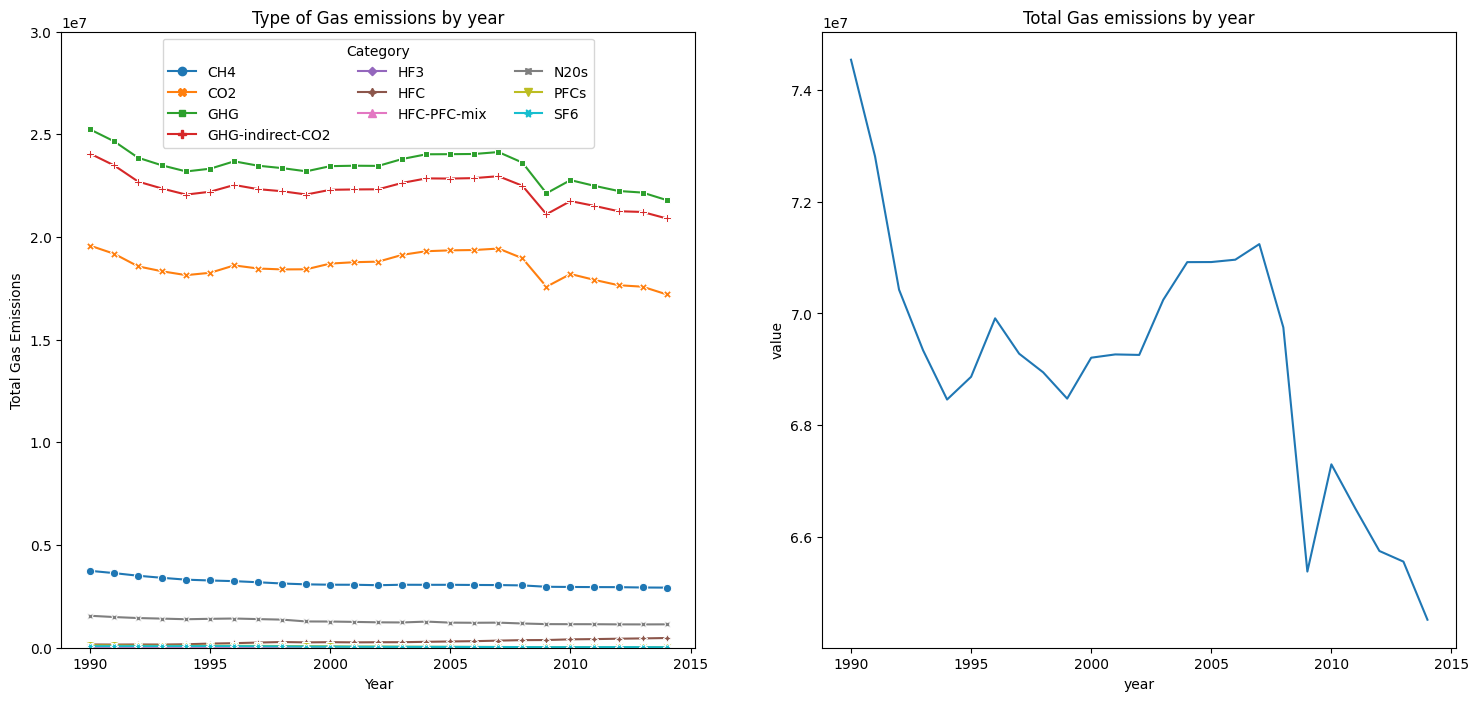

In [14]:
#line plot
##sum gas by category
sum_by_category=GHG_Data_Clean.groupby(['year','category'])["value"].sum().reset_index()
sum_by_category.head()

#sum gas by year
sum_by_year=GHG_Data_Clean.groupby('year')["value"].sum().reset_index()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the first line plot
sns.lineplot(data=sum_by_category, x="year", y="value", hue="category", style="category", markers=True, dashes=False, ax=axes[0])
axes[0].set_title('Type of Gas emissions by year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Gas Emissions')
axes[0].legend(title='Category', bbox_to_anchor=(0.5, 1.0), loc='upper center', ncol=3)
axes[0].set_ylim(0, 3e7)

sum_by_year=GHG_Data_Clean.groupby('year')["value"].sum().reset_index()

sns.lineplot(data=sum_by_year,x="year",y="value")
axes[1].set_title('Total Gas emissions by year')


plt.show()

## **Greenhouse (GHG) Gas Emission By Country**


---
The area graph shows the proportion of greenhouse gas (GHG) emissions in multiple countries revealing the amount of GHG released between 1999 to 2015. Developed countries like the USA, Russia, and the European Union mostly have higher areas indicating that GHG compared to other developing countries due to several factors such as industry development, high size population, and reliance on energy sources that use non-renewable energy(coal, hydro, etc). Those kinds of things explain why those are more likely to produce high greenhouse gas(GHG).

However, even do many new technological creation and the increase size population, the greenhouse gas emission by 1999 to 2015 create a good significant result which leads to greenier world.

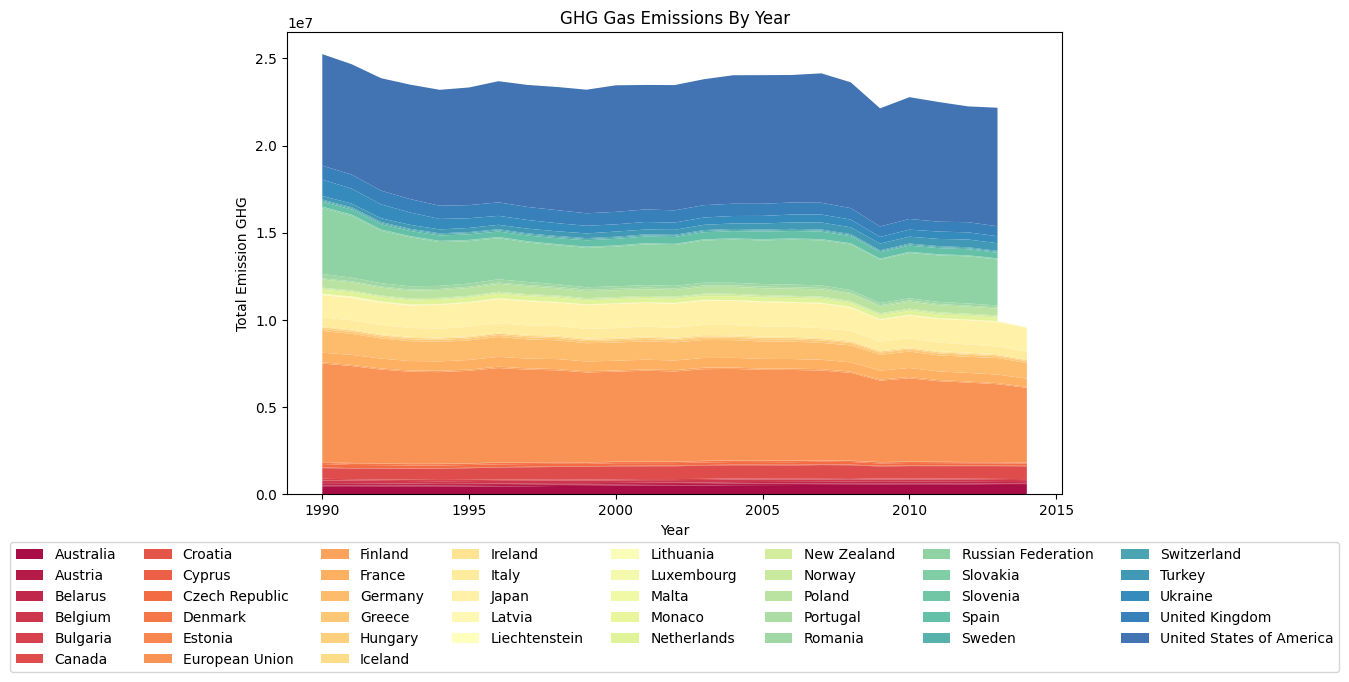

In [15]:
#area chart plot
GHG_by_country=GHG_Data_Clean.loc[(GHG_Data_Clean['category'] == "GHG")].groupby(['country_or_area','year'])["value"].sum().reset_index()

#pivot the data
pivot_GHG = GHG_by_country.pivot(index='year',columns='country_or_area',values='value')
cmap = plt.get_cmap("Set3")  # Replace "Set3" with your desired Matplotlib colormap
colors = cmap(range(45))
plt.figure(figsize=(10, 6))

plt.stackplot(pivot_GHG.index,
              pivot_GHG.values.T,
              labels=pivot_GHG.columns,
              colors = sns.color_palette("Spectral", n_colors=45))
plt.xlabel('Year')
plt.ylabel('Total Emission GHG')
plt.title('GHG Gas Emissions By Year') # Add a title
plt.legend(loc="lower center",ncol=8,bbox_to_anchor=(0.5,-0.4))

# Show the plot
plt.show()

## **The Compositon Gas Emission For Top and Low contributor Gas country**

---

The composition of gas emissions for top and low contributors is seen as dominated by three gases which are GHG, GHG-indirect-CO2, and CO2. This means that those gases are widely used in their country. For the top ten gas emissions, the result appears that all developed were in the result meaning that emissions were mostly caused by the industrial activities, energy consumption, and transportation infrastructure seen in these economically advanced nations. This concentration of emissions from industrialized countries underlines the need for targeted and coordinated efforts in these regions to address and reduce the impact of greenhouse gas emissions on a global scale. The largest contributor to gas emissions is the USA followed by the European Union, Russia and Japan.

Monaco and Liechtenstein, both considered as developing countries, have minimal gas emissions because to their comparatively tiny populations of roughly 40,000 people each. The small population size corresponds to less industrial activities and lower energy consumption, contributing to the overall lower greenhouse gas emissions compared to larger, more industrialised nations.

The interesting part where a developed country like Iceland has eventually successfully gotten the result. The reason why Iceland has produced low gas emissions is because it has an energy policy. The Energy Policy in Iceland outlines a vision for 2050, where the goal is to have renewable energy sources completely replace fossil fuels, while carbon neutrality will be attained by 2040. Right now, Iceland is more relay on renewable energy sources like solar, wind, etc. This is the reason those can secure their place on lowest gas emission.

In [16]:
#bar chart plot
sum_by_country=GHG_Data_Clean.groupby(['country_or_area'])["value"].sum().reset_index()
data=sum_by_country.nlargest(10,"value")
top_ten_largest=data.country_or_area.unique()
sum_by_country.nlargest(10,"value")

,country_or_area,value
42,United States of America,5.211098e+08
11,European Union,3.828720e+08
33,Russian Federation,1.950814e+08
20,Japan,1.016175e+08
14,Germany,7.809182e+07
5,Canada,5.300515e+07
13,France,4.051115e+07
19,Italy,3.958366e+07
40,Ukraine,3.788339e+07
0,Australia,3.643745e+07


In [17]:
data2=sum_by_country.groupby('country_or_area').sum().reset_index().nsmallest(10, 'value')
top_ten_smallest=data2.country_or_area.unique()
data2

,country_or_area,value
26,Monaco,7.271610e+03
22,Liechtenstein,1.218667e+04
25,Malta,2.070858e+05
17,Iceland,3.030974e+05
24,Luxembourg,5.749501e+05
7,Cyprus,6.181270e+05
21,Latvia,1.000865e+06
35,Slovenia,1.443227e+06
10,Estonia,1.582383e+06
23,Lithuania,1.841461e+06


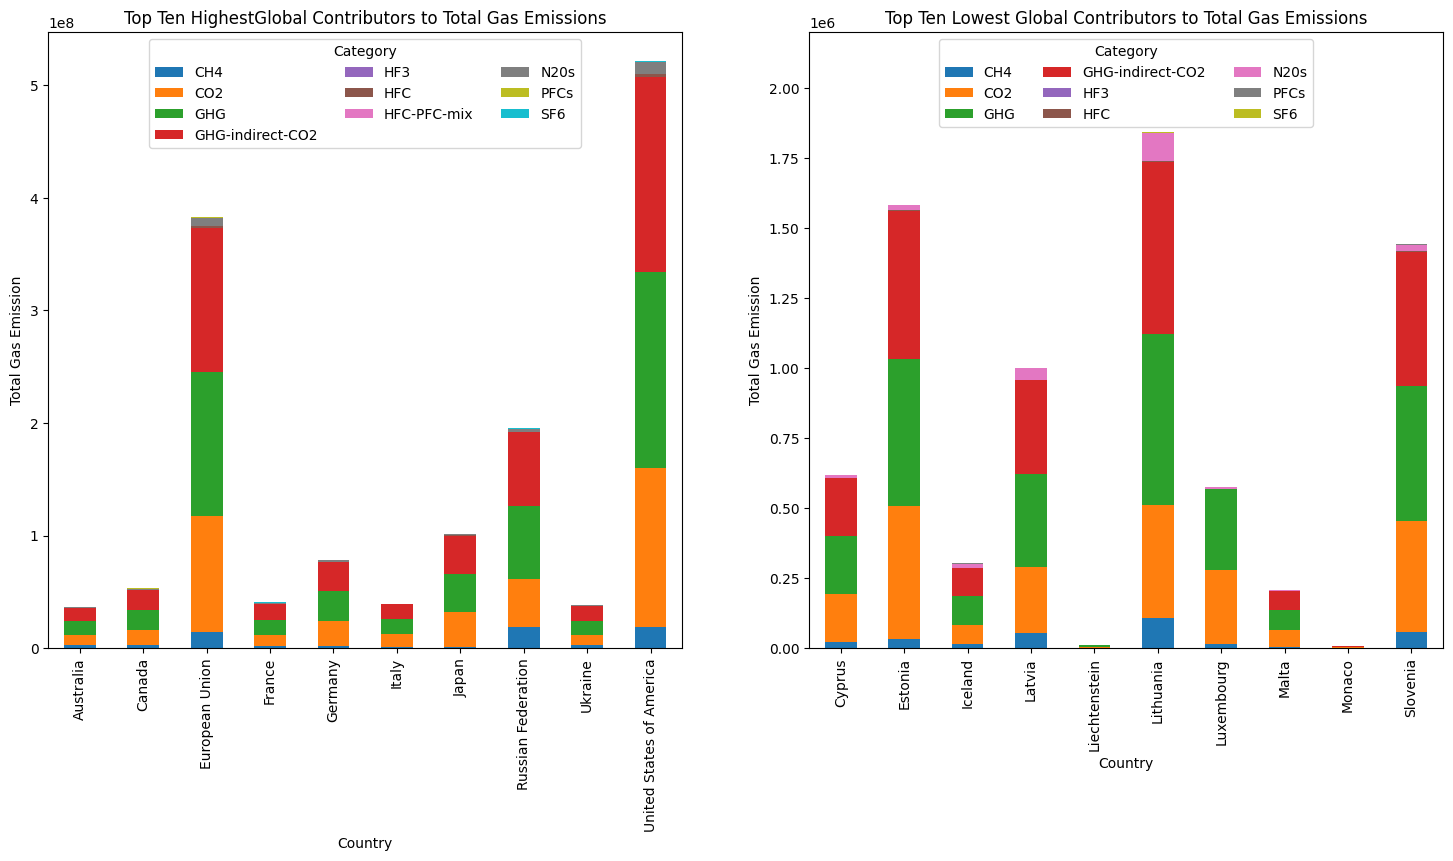

In [18]:
# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
selected_topcountry_data = GHG_Data_Clean[GHG_Data_Clean['country_or_area'].isin(top_ten_largest)].groupby(['country_or_area','category'])["value"].sum().reset_index()
selected_lowcountry_data = GHG_Data_Clean[GHG_Data_Clean['country_or_area'].isin(top_ten_smallest)].groupby(['country_or_area','category'])["value"].sum().reset_index()

# Pivot the data
pivot_topten = selected_topcountry_data.pivot(index='country_or_area', columns='category', values='value')
pivot_lowten = selected_lowcountry_data.pivot(index='country_or_area', columns='category', values='value')

# Plot stacked bar chart highest emission
pivot_topten.plot(kind='bar', stacked=True, ax=axes[0])

axes[0].set_title('Top Ten HighestGlobal Contributors to Total Gas Emissions')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Total Gas Emission')
axes[0].legend(title='Category', bbox_to_anchor=(0.5, 1), loc='upper center',ncol=3)

# Plot stacked bar chart lowest emission
pivot_lowten.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Top Ten Lowest Global Contributors to Total Gas Emissions')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Total Gas Emission')
axes[1].set_ylim(0,2.2e6)
axes[1].legend(title='Category', bbox_to_anchor=(0.5, 1), loc='upper center',ncol=3)
plt.show()

## ** Total Gas Emission vs Land/Ocean Average Temperature**

---

From the regression total gas emission vs land/ocean average temperature grapg, the relationship between two of them is appear negative linear correlation means that as total gas emissions increase, the land and ocean average temperature tends to decrease. This is due to existence of specific greenhouse gases in the environment, such as gas carbon dioxide. These gases trap heat, which adds to the greenhouse effect. However, another factor can be conclude
is the complexity of climate change system.

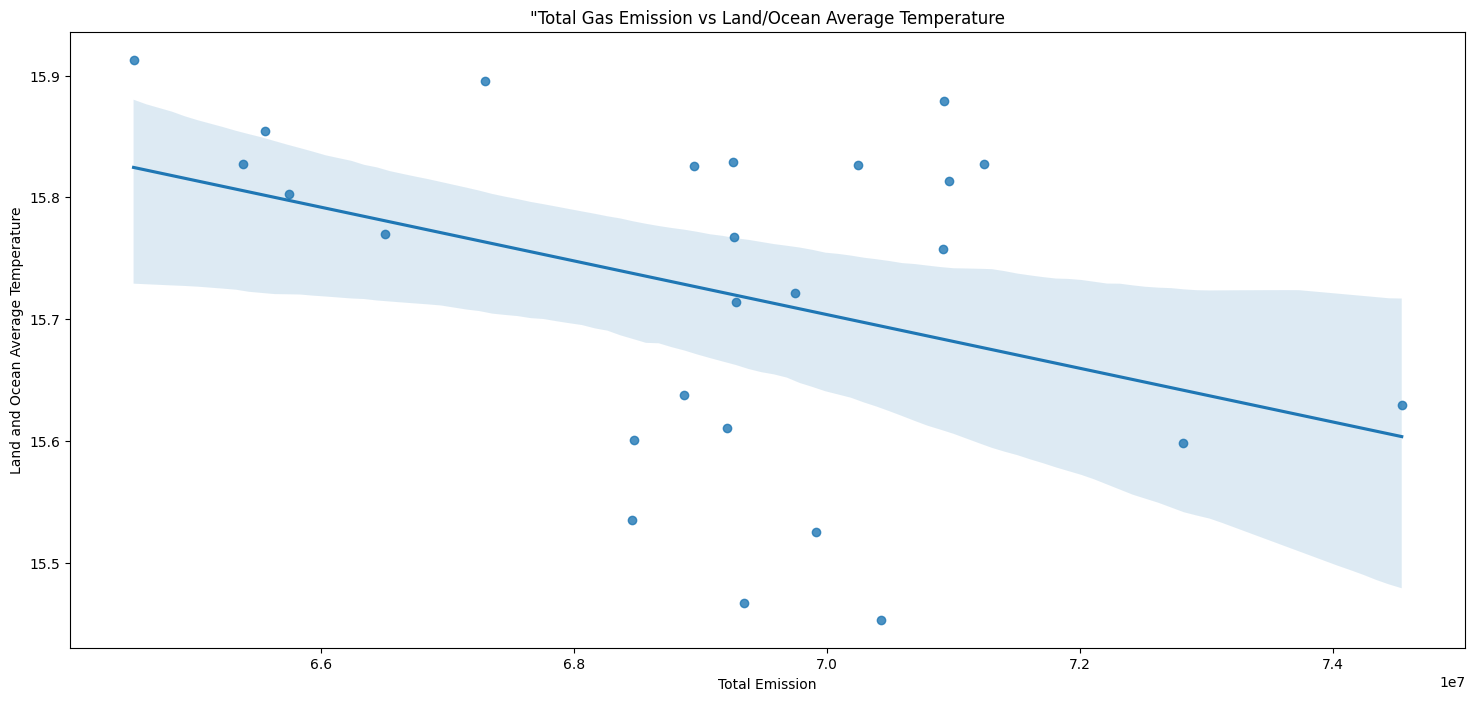

In [37]:
# Plot
temperature_oceanAndLan = clean_temperature_data.groupby(clean_temperature_data['dt'].dt.year)['LandAndOceanAverageTemperature'].mean().reset_index()
regr_model = pd.merge(sum_by_year, temperature_oceanAndLan, left_on='year', right_on='dt', how='inner')
regr_model=regr_model.drop('dt', axis=1)
plt.subplots(figsize=(18, 8))

sns.regplot(data=regr_model, x="value",y='LandAndOceanAverageTemperature')
plt.title('"Total Gas Emission vs Land/Ocean Average Temperature')
plt.xlabel('Total Emission')
plt.ylabel('Land and Ocean Average Temperature')
# Show the plot
plt.show()

# **Conclusion**

---

Conlusion, this study has achieved two primary objective which are the growth of gas emission and the relationship between gas emission and earth temperature.

Our analysis of the first aim reveals a linear decrease in greenhouse gas emissions between 1990 and 2015. This indicates improved emission management methods, which contribute to a progressive slowing of climate change. Taking inspiration from environmentally concerned developed countries such as Iceland, there is a compelling case for adopting their effective emission control strategies. Implementing such measures on a global scale can help us steer towards a more sustainable and ecologically friendly future, eventually leading to a greener Earth.

Lastly, our last objective is focus on the relationship gas emission and earth temperature , which should be if the gas emission increase the earth temperature also increase but due to shorted data on list country for emission gas data has only 59 out 195 countries which maybe effect the regression result. Somehow big countries like India, China are not in the data. However, another reason that we can conclude the complexity of climate change system which maybe interconnected variables which the climate change.